<a href="https://colab.research.google.com/github/brito-bernardo/osmnx/blob/main/BusStopIntersections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 2.5 MB/s eta 0:00:00


In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import nearest_points

In [3]:
place_name = "Porto, Portugal"
G = ox.graph_from_place(place_name, network_type='drive')


In [4]:
# GET bus stop data
bus_stops = ox.geometries_from_place(place_name, tags={'highway': 'bus_stop'})


<ipython-input-4-50e5ea5ff003>:2: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bus_stops = ox.geometries_from_place(place_name, tags={'highway': 'bus_stop'})


In [5]:
# Filter intersections
intersections = ox.graph_to_gdfs(G, nodes=True, edges=False)
filtered_intersections = intersections[intersections.index.isin([node for node, degree in dict(G.degree()).items() if degree > 2])]


In [10]:
# Filter intersections near to bus stops
def is_near_bus_stop(intersection, bus_stops, threshold=20):
    point = Point(intersection['x'], intersection['y'])
    nearest_stop = nearest_points(point, bus_stops.unary_union)[1]
    return point.distance(nearest_stop) < threshold


In [11]:
near_bus_stop_intersections = filtered_intersections[filtered_intersections.apply(lambda x: is_near_bus_stop(x, bus_stops), axis=1)]


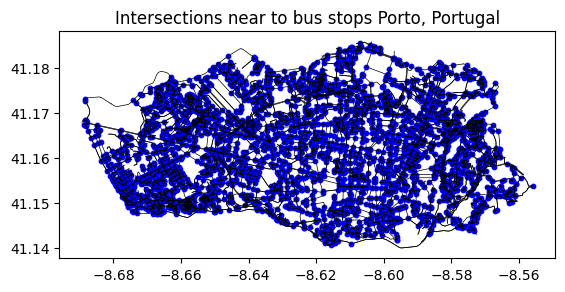

In [12]:
# Plot ONLY edges
fig, ax = plt.subplots()
for _, edge in ox.graph_to_gdfs(G, nodes=False, edges=True).iterrows():
    line = edge.geometry
    x, y = line.xy
    ax.plot(x, y, color="black", linewidth=0.5)

# Plot bus_stop_intersections
near_bus_stop_intersections.plot(ax=ax, color='blue', markersize=10)

ax.set_title("Intersections near to bus stops {}".format(place_name))
plt.show()
